# DOST AI Summer School 2017

## Copyright © 2017.  Rafael Cabredo and Maria Isabel Saludares

# Machine learning algorithms

Welcome to an overview of machine learning!

Remember the typical machine learning pipeline below?

<img src="images/MLPipeline.png">

# 1. Get your data

For this experiment, we will use a subset of the Breast Cancer Wisconsin dataset. This is found in the data folder: "data/breast-cancer-wisconsin.csv"

The original data set can be downloaded from: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

The data has 10 features and 699 instances.  Feature information can be seen below:
<pre>
 No  Feature                      Domain 
--------------------------------------------- 
  0  Sample Code number            id no  
  1  Clump Thickness               1 - 10   
  2  Uniformity of Cell Size       1 - 10
  3  Uniformity of Cell Shape      1 - 10
  4  Marginal Adhesion             1 - 10
  5  Single Epithelial Cell Size   1 - 10
  6  Bare Nuclei                   1 - 10
  7  Bland Chromatin               1 - 10
  8  Normal Nucleoli               1 - 10
  9  Mitoses                       1 - 10
 10  Class:                        (benign or malignant)
</pre>



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

bcw_raw = pd.read_csv("data/breast-cancer-wisconsin.csv")
bcw_raw = bcw_raw.replace('?', 0)
bcw_raw

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign
5,1017122,8,10,10,8,7,10,9,7,1,malignant
6,1018099,1,1,1,1,2,10,3,1,1,benign
7,1018561,2,1,2,1,2,1,3,1,1,benign
8,1033078,2,1,1,1,2,1,1,1,5,benign
9,1033078,4,2,1,1,2,1,2,1,1,benign


After loading your data, it is a good practice to see what your data looks like.

Subtask:  
1. Visualize the different features


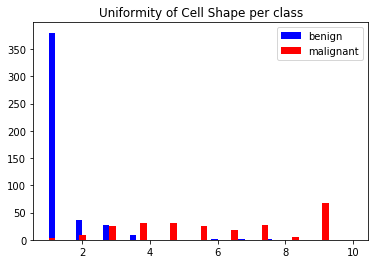

In [2]:

#subtask 1
ax = plt.subplot(111)

#f2: Uniformity of Cell Shape
f2_benign = bcw_raw[bcw_raw.Class=="benign"]["f2"]
f2_malignant = bcw_raw[bcw_raw.Class=="malignant"]["f2"]

ax.hist(f2_benign, width=0.2,color='b', label="benign")
ax.hist(f2_malignant, width=0.2,color='r', label="malignant")

plt.title("Uniformity of Cell Shape per class")
plt.legend()
plt.show()


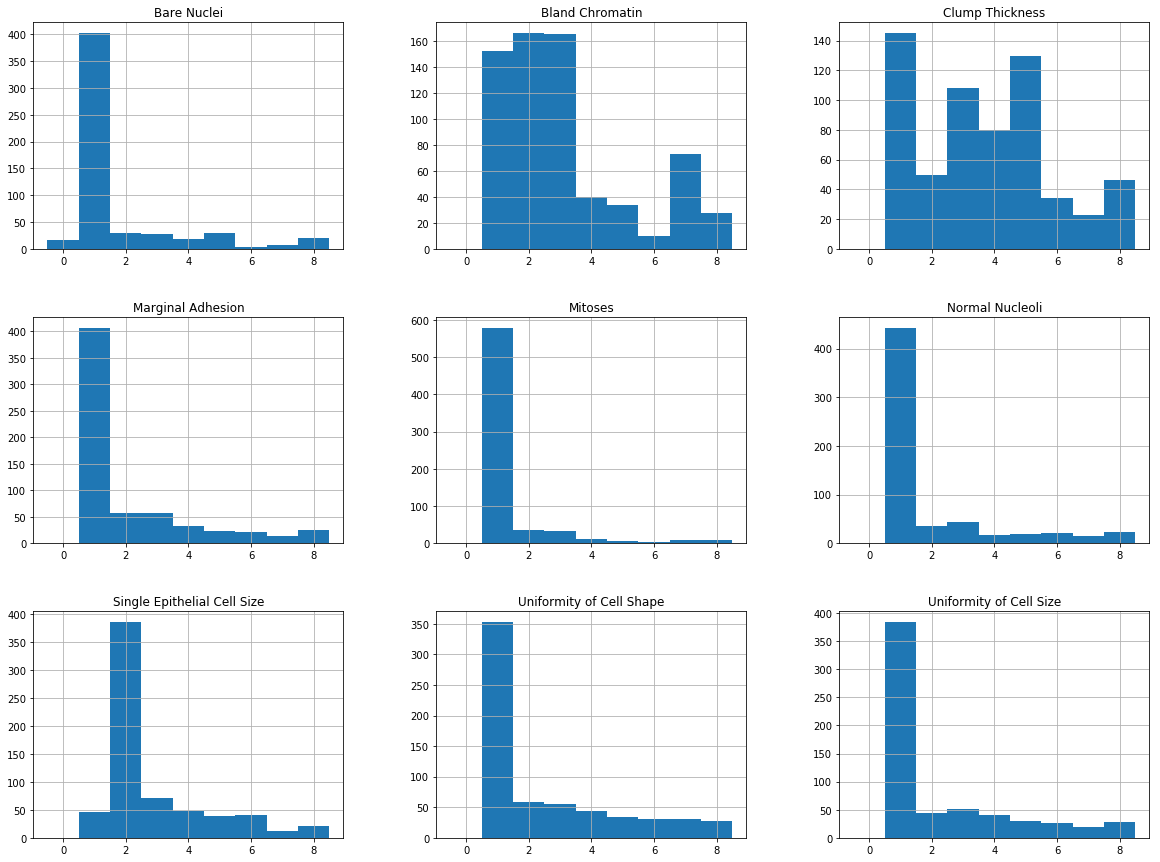

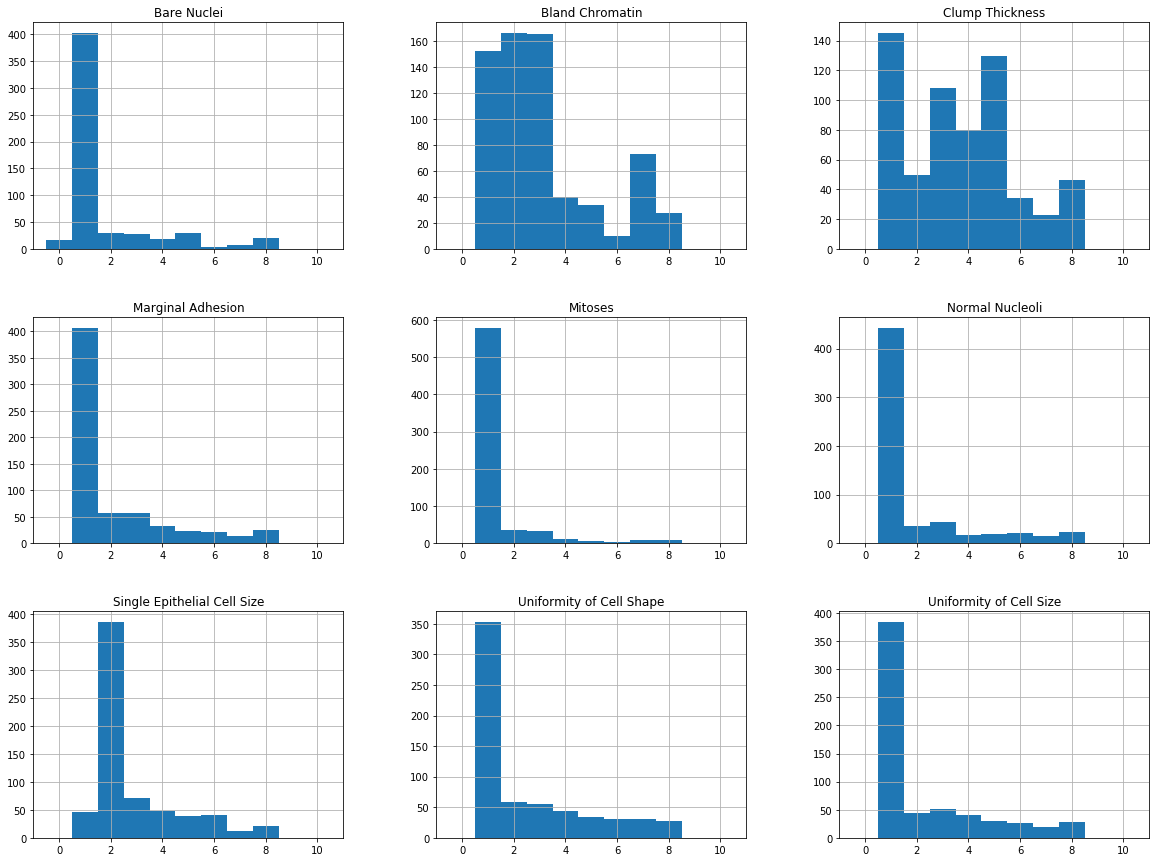

In [3]:

# Subtask 1 (another data visualization)

# Histogram of all the features
'''
x is the dataset that contains the nine features.
To apply the same code on a different dataset,
make sure to change two values:
    x             :  dataset
    feature_names :  names of the features
    
Given that the dataset is M x N (with N features),
the feature_names is 1 x N.
'''

features = bcw_raw.drop(bcw_raw.columns[[0, 10]], axis=1)
features = np.array(features, dtype=int)
feature_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei",
                 "Bland Chromatin", "Normal Nucleoli", "Mitoses"]

df = pd.DataFrame(features, range(features.shape[0]), columns = feature_names)
bins = range(11)
df.hist(bins=np.arange(10)-0.5, figsize=(20,15));
for array in df.hist(bins=np.arange(10)-0.5, figsize=(20,15)):
    for subplot in array:
        subplot.set_xlim((-1,11))
        

In [4]:
from sklearn.cluster import KMeans
from sklearn import utils, metrics
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#Prepare the data for training. We remove the label/Class.
target = "Class"
X = bcw_raw.drop(bcw_raw.columns[[0, 10]], axis=1)
X = np.array(X,dtype=int) #change everything to an integer (just in case)
y = bcw_raw[target]

#X,y = utils.shuffle(X, y) ## Uncomment if you want to shuffle the dataset

# Let's make the y values numerical (0: benign, 1: malignant) so we can plot it easily
y = pd.Categorical(y).codes
print("Feautures: \n",X)
print("Labels: \n", y)

Feautures: 
 [[ 5  1  1 ...,  3  1  1]
 [ 5  4  4 ...,  3  2  1]
 [ 3  1  1 ...,  3  1  1]
 ..., 
 [ 5 10 10 ...,  8 10  2]
 [ 4  8  6 ..., 10  6  1]
 [ 4  8  8 ..., 10  4  1]]
Labels: 
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 

You now have two variables from the raw dataset:

        1) X : features (values ranging from 1-10)

        2) y : labels (values of 0 (for benign) and 1 (for malignant)


## Feature Selection and Reduction

### Principal Component Analysis (PCA)

The X variable which contains the features is a N x 9 dataset.  One way to reduce the computation for building a model, you can use Principal Component Analysis to reduvce the dimensions of the original dataset with minimal loss of information.

The outcome of the principal component analysis (PCA) is to project a feature space (our dataset containing d-dimensional samples) onto a smaller subspace tha t represents our data.

This is performed to <b>reduce the computational costs</b> and <b>error in pattern estimation (but not always)</b> by reducing the number of dimensions of the feature space.  In PCA, the entire data is projected onto a different subspace by finding axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class).

### What consitiutes a "good" subspace?

The goal is to reduce the dimensions of a <b><i>d</i>-dimensional data</b> by projecting to a <b><i>k</i>-dimensional data</b>, where $k < d$.  So we have two main questions:

1.  How do we know the size we should choose for $k$?
2.  How do we know if we have a feature space that represents our data "well"?

This can be done by observing the eigenvalues of the dataset.  Similar magnitude values of the eigenvalues is an indicator that the dataset is already in a "good" subspace.  If some of the eigenvalues are very low (or close to 0), they are less informative, and can be considered for dropping.

For a more detailed step-by-step on how PCA works, and other references on decomposing signals, you can refer to the websites below.

1. PCA Step-by-step: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
2. Scikit-learn documentation on data decomposition: http://scikit-learn.org/stable/modules/decomposition.html

Source: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html


### Implementing PCA

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=3)

# Note that the dimension of the dataset must
# be N x d where N is the number of samples
# and d is the number of features for each sample.
# If the dataset x is in the format d x N
# use x.T to transform the dataset to N x d
X_sklearn = sklearn_pca.fit_transform(X)

# Choose a subset for training and testing
#  split:  training (70%)   testing (30%)
X_train_3, X_test_3, y_train, y_test = train_test_split(X_sklearn, y, test_size=0.3)
X_sklearn


array([[ -4.40904732,   0.01994907,  -1.73022234],
       [  4.88110465,  -4.90332617,   1.02718206],
       [ -4.56415067,  -0.65506726,   0.04967586],
       ..., 
       [ 10.33687644,   7.24412961,   0.53116848],
       [  6.47179821,   2.54870704,   1.74004474],
       [  7.56560301,   1.23300626,   1.93715437]])

### Visualization
Visualize the selected features in 3D space (since we selected only 3 features).

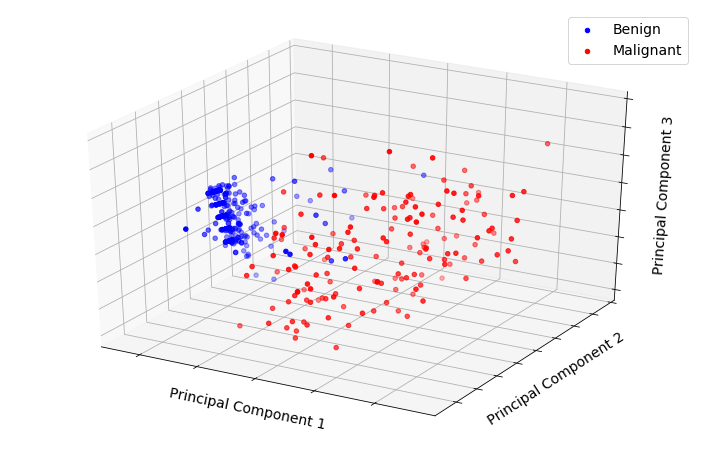

In [6]:

fig = plt.figure(1, figsize=(10,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1])
for out, lab, col in zip((0,1), ('Benign', 'Malignant'),
                        ('blue', 'red')):
    ax.scatter(X_train_3[y_train == out, 0], 
               X_train_3[y_train == out, 1],
               X_train_3[y_train == out, 2],
                label = lab,
                c=col)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)
ax.set_zlabel("Principal Component 3", fontsize=14)
ax.legend(loc='best', fontsize=14)


## Performance evaluation: Supervised learning

In [7]:
from sklearn import linear_model, utils, metrics

#train the model
logres = linear_model.LogisticRegression()
logres.fit(X_train_3, y_train)

y_test_pred = logres.predict(X_test_3)
print(metrics.classification_report(y_test, y_test_pred))


             precision    recall  f1-score   support

          0       0.97      0.97      0.97       130
          1       0.95      0.95      0.95        80

avg / total       0.96      0.96      0.96       210



## Performance evaluation: Unsupervised learning

In [8]:
# Use the use test set on the clustering algorithm
kmeans3 = KMeans(n_clusters=2).fit(X_train_3)
#print(metrics.classification_report(y_train, kmeans3.labels_))

y_test_pred = kmeans3.predict(X_test_3)
print(metrics.classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.04      0.02      0.03       130
          1       0.06      0.10      0.07        80

avg / total       0.05      0.05      0.05       210



In [9]:
# Use the whole dataset on the clustering algorithm
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(X_sklearn)
print(metrics.classification_report(y, kmeans3.labels_))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       458
          1       0.95      0.92      0.94       241

avg / total       0.96      0.96      0.96       699



The model can also be applied to a testing set (which was not used to train the model)

# Activity

1. Select a different set of features. Use two (2) dimensions and visualize the features.
2. Apply a supervised and unsupervised learning algorithms.
3. Evaluate their performances using the labels.
4. Compare their results with the previous results.

## 1. Feature Selection and Reduction

### Identify features (and visualization)

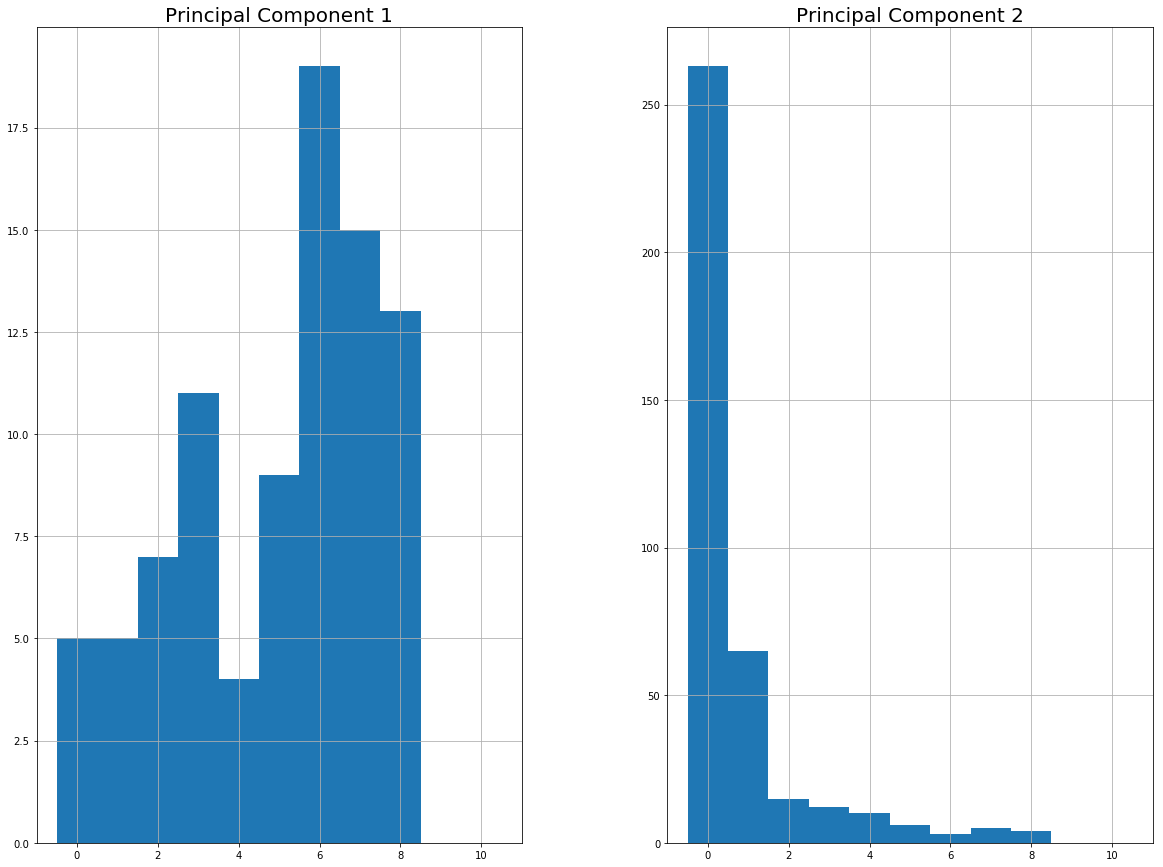

In [10]:
feat_for_clus_names = [ "Principal Component 1",
                        "Principal Component 2"]

num_of_components = 2
sklearn_pca = sklearnPCA(n_components=num_of_components)
X_sklearn = sklearn_pca.fit_transform(X)
X_train_2, X_test_2, y_train, y_test = train_test_split(X_sklearn, y, test_size=0.3)

# Histogram of 2 the features
df = pd.DataFrame(X_train_2, range(X_train_2.shape[0]), columns = feat_for_clus_names)
bins = range(11)
for array in df.hist(bins=np.arange(10)-0.5, figsize=(20,15)):
    for subplot in array:
        subplot.set_xlim((-1,11))
        subplot.title.set_fontsize(20)

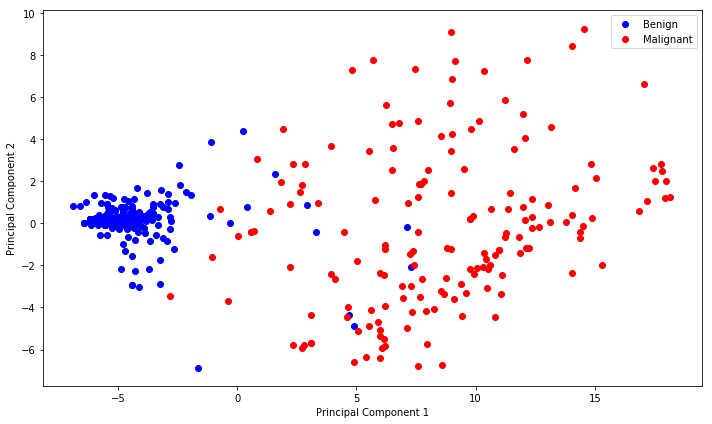

In [11]:
## Another visualization of the dataset after PCA
plt.figure(figsize=(10,6))
for out, lab, col in zip((0,1), ('Benign', 'Malignant'),
                        ('blue', 'red')):
    plt.scatter(X_train_2[y_train == out, 0], 
                X_train_2[y_train == out, 1],
                label = lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()

## Supervised Learning: Performance Evaluation

In [12]:
from sklearn import linear_model, utils, metrics

#train the model
logres = linear_model.LogisticRegression()
X_train_2.shape
logres.fit(X_train_2, y_train)

y_pred_log = logres.predict(X_test_2)
print(metrics.classification_report(y_test, y_pred_log))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97       136
          1       0.91      0.97      0.94        74

avg / total       0.96      0.96      0.96       210



## Unsupervised Learning: Performance Evaluation

In [13]:

## Applying on the training set
kmeans2 = KMeans(n_clusters=2).fit(X_train_2)
#print(metrics.classification_report(y_train, kmeans2.labels_))

y_pred_kmeans = kmeans2.predict(X_test_2)
print(metrics.classification_report(y_test, y_pred_kmeans))


             precision    recall  f1-score   support

          0       0.97      0.96      0.97       136
          1       0.93      0.95      0.94        74

avg / total       0.96      0.96      0.96       210



## Discussion

### Comparison of results

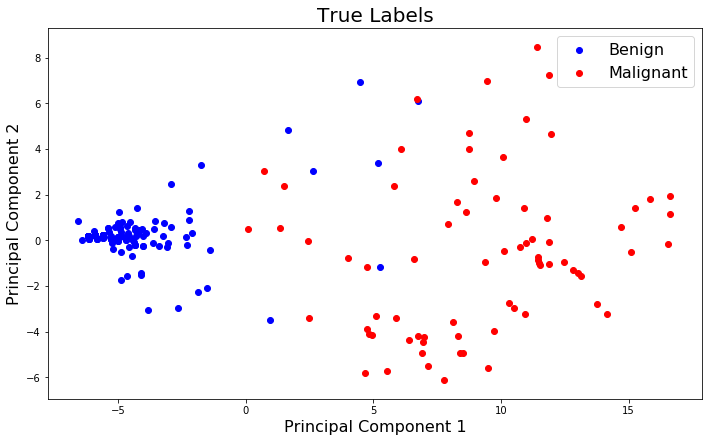

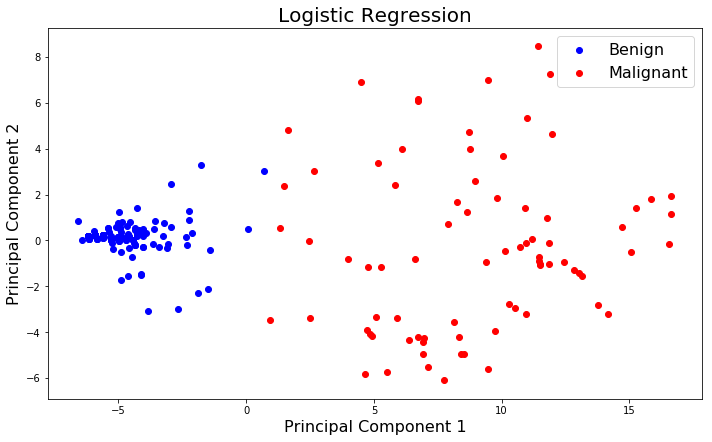

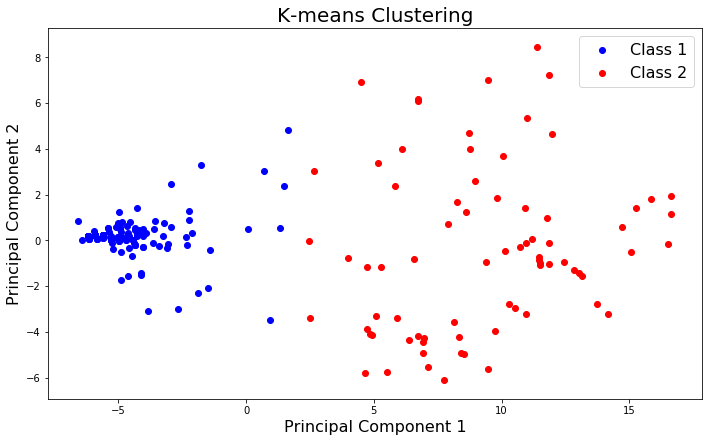

In [14]:
## Another visualization of the dataset after PCA
for y_test_pred, title in zip((y_test, y_pred_log, y_pred_kmeans), 
        ("True Labels", "Logistic Regression", "K-means Clustering")):
    
    if title == "K-means Clustering":
        labels = ['Class 1', 'Class 2']
    else:
        labels = ['Benign', 'Malignant']
        
    plt.figure(figsize=(10,6))
    for out, lab, col in zip((0,1), (labels[0], labels[1]),
                            ('blue', 'red')):
        plt.scatter(X_test_2[y_test_pred == out, 0], 
                    X_test_2[y_test_pred == out, 1],
                    label = lab,
                    c=col)
    plt.xlabel('Principal Component 1', fontsize=16)
    plt.ylabel('Principal Component 2', fontsize=16)
    plt.legend(loc='best', fontsize=16)
    plt.tight_layout()
    plt.title(title, fontsize=20)


## Challenge

### Apply PCA on the Movie dataset (use all the features available), then use this to predict whether a movie will have low sales, average sales, or high sales.

### Load dataset and seprate the features from labels

### Pre-process the dataset (normalization, standardization of data etc.)

### Implement PCA on the data

### Choose a supervised learning algorithm to create a model



### Evaluate the performance of the model